# **Iris Prediction using Decision Tree Algorithm** *by Akhilesh Thite*

## **Importing the libraries**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Importing the dataset**

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, :-1].values # Independent variables
y = dataset.iloc[:, -1].values  # Dependent or Target variable (Iris-Species)

## **Dataset information**

In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.info()
# datatypes and null_value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.shape
# Rows & Columns

(150, 6)

## **Exploratory Data Analysis (EDA)**

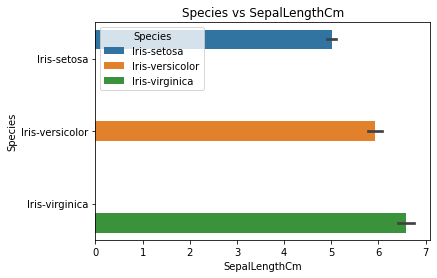

In [6]:
plt.title('Species vs SepalLengthCm')
sns.barplot(data= dataset, x = 'SepalLengthCm', y= 'Species', hue = 'Species')

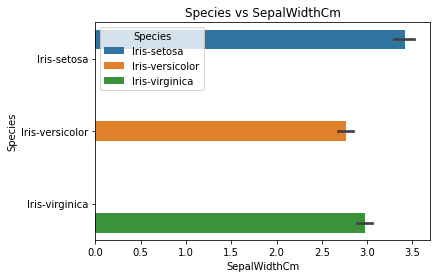

In [7]:
plt.title('Species vs SepalWidthCm')
sns.barplot(data= dataset, x = 'SepalWidthCm', y= 'Species', hue = 'Species')

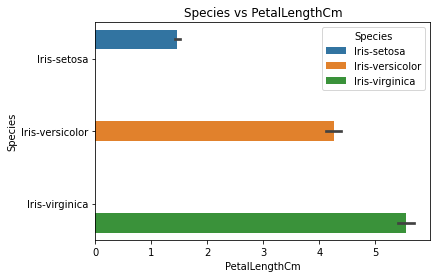

In [8]:
plt.title('Species vs PetalLengthCm')
sns.barplot(data= dataset, x = 'PetalLengthCm', y= 'Species', hue = 'Species')

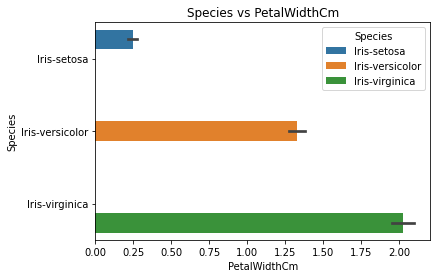

In [9]:
plt.title('Species vs PetalWidthCm')
sns.barplot(data= dataset, x = 'PetalWidthCm', y= 'Species', hue = 'Species')

## **Splitting the dataset into the Training set and Test set**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Training the Decision Tree Classification model on the Training set**

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## **Predicting Prediction class**

In [13]:
print(classifier.predict(sc.transform([[1, 5.1, 3.5, 1.4, 0.2]])))

['Iris-setosa']


## **Predicting result individually**

In [14]:
y_pred = classifier.predict(X_test)

## **Making the Confusion Matrix "Accuracy"**



In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 100.00%


## **Visualising the Real class and Predicted class**

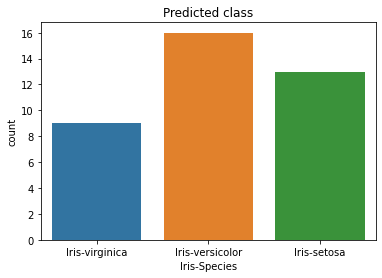

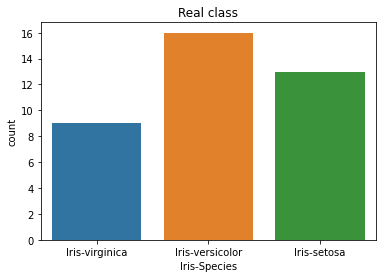

In [16]:
sns.countplot(y_pred, data=dataset)
plt.title('Predicted class')
plt.xlabel('Iris-Species')
plt.show()
sns.countplot(y_test,  data=dataset)
plt.title('Real class')
plt.xlabel('Iris-Species')
plt.show()